# Portable Executable (PE) header information
- Malware classification
- https://www.kaggle.com/datasets/amauricio/pe-files-malwares

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- https://jakevdp.github.io/PythonDataScienceHandbook/

In [ ]:
df_malware = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Malware-data/dataset_malwares.csv")

In [ ]:
df_malware.head(3)

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0


In [ ]:
df_malware.tail()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
19606,clip.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,8,85,0,0,24948,28672,0,0
19607,VNC-Server-6.2.0-Windows.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,10,391,0,0,1413420,1462272,0,18855424
19608,Microsoft.GroupPolicy.Management.ni.dll,23117,0,0,0,0,0,0,0,0,...,3758096448,0,0,0,0,0,0,61440,0,0
19609,cryptuiwizard.dll,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,12,162,8,89008,94904,102400,0,0
19610,winhttp.dll,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,35,226,58,8348,545812,557056,0,0


In [ ]:
for cName in df_malware.columns:
  print(cName)

Name
e_magic
e_cblp
e_cp
e_crlc
e_cparhdr
e_minalloc
e_maxalloc
e_ss
e_sp
e_csum
e_ip
e_cs
e_lfarlc
e_ovno
e_oemid
e_oeminfo
e_lfanew
Machine
NumberOfSections
TimeDateStamp
PointerToSymbolTable
NumberOfSymbols
SizeOfOptionalHeader
Characteristics
Magic
MajorLinkerVersion
MinorLinkerVersion
SizeOfCode
SizeOfInitializedData
SizeOfUninitializedData
AddressOfEntryPoint
BaseOfCode
ImageBase
SectionAlignment
FileAlignment
MajorOperatingSystemVersion
MinorOperatingSystemVersion
MajorImageVersion
MinorImageVersion
MajorSubsystemVersion
MinorSubsystemVersion
SizeOfHeaders
CheckSum
SizeOfImage
Subsystem
DllCharacteristics
SizeOfStackReserve
SizeOfStackCommit
SizeOfHeapReserve
SizeOfHeapCommit
LoaderFlags
NumberOfRvaAndSizes
Malware
SuspiciousImportFunctions
SuspiciousNameSection
SectionsLength
SectionMinEntropy
SectionMaxEntropy
SectionMinRawsize
SectionMaxRawsize
SectionMinVirtualsize
SectionMaxVirtualsize
SectionMaxPhysical
SectionMinPhysical
SectionMaxVirtual
SectionMinVirtual
SectionMaxPoint

In [ ]:
df_malware.describe()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,19611.0,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,19611.000000,...,1.961100e+04,19611.0,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04
mean,23117.0,178.615726,71.660752,49.146958,37.370710,37.032635,64178.739687,10.418490,226.46530,29.689103,...,3.163632e+09,0.0,6.112437,101.912804,14.131865,3.368566e+05,4.047213e+05,5.555810e+05,1.238834e+06,8.814868e+05
std,0.0,987.200729,1445.192977,1212.201919,864.515405,915.833139,9110.755873,637.116265,1249.68033,1015.303419,...,5.860332e+08,0.0,7.525158,127.076767,154.958102,2.181191e+07,4.704601e+06,6.772167e+06,5.868961e+07,2.167579e+07
min,23117.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.073742e+09,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,2.000000,17.000000,0.000000,0.000000e+00,2.960400e+04,4.096000e+04,0.000000e+00,0.000000e+00
50%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,4.000000,80.000000,0.000000,0.000000e+00,8.222400e+04,1.310720e+05,0.000000e+00,0.000000e+00
75%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,8.000000,135.000000,0.000000,0.000000e+00,2.477080e+05,3.870720e+05,0.000000e+00,3.184640e+05
max,23117.0,59448.000000,63200.000000,64613.000000,43690.000000,43690.000000,65535.000000,61436.000000,65464.00000,63262.000000,...,4.294967e+09,0.0,588.000000,4016.000000,7319.000000,2.147484e+09,5.368914e+08,8.304108e+08,2.906159e+09,2.415919e+09


In [ ]:
y = df_malware["Malware"]
X = df_malware.drop(["Name", "Malware"], axis=1)

In [ ]:
y.describe()

count    19611.000000
mean         0.744429
std          0.436193
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Malware, dtype: float64

In [ ]:
X.describe()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,19611.0,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,19611.000000,...,1.961100e+04,19611.0,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04
mean,23117.0,178.615726,71.660752,49.146958,37.370710,37.032635,64178.739687,10.418490,226.46530,29.689103,...,3.163632e+09,0.0,6.112437,101.912804,14.131865,3.368566e+05,4.047213e+05,5.555810e+05,1.238834e+06,8.814868e+05
std,0.0,987.200729,1445.192977,1212.201919,864.515405,915.833139,9110.755873,637.116265,1249.68033,1015.303419,...,5.860332e+08,0.0,7.525158,127.076767,154.958102,2.181191e+07,4.704601e+06,6.772167e+06,5.868961e+07,2.167579e+07
min,23117.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.073742e+09,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,2.000000,17.000000,0.000000,0.000000e+00,2.960400e+04,4.096000e+04,0.000000e+00,0.000000e+00
50%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,4.000000,80.000000,0.000000,0.000000e+00,8.222400e+04,1.310720e+05,0.000000e+00,0.000000e+00
75%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,8.000000,135.000000,0.000000,0.000000e+00,2.477080e+05,3.870720e+05,0.000000e+00,3.184640e+05
max,23117.0,59448.000000,63200.000000,64613.000000,43690.000000,43690.000000,65535.000000,61436.000000,65464.00000,63262.000000,...,4.294967e+09,0.0,588.000000,4016.000000,7319.000000,2.147484e+09,5.368914e+08,8.304108e+08,2.906159e+09,2.415919e+09


In [ ]:
print(X.shape)

(19611, 77)


In [ ]:
print(y.shape)

(19611,)


In [ ]:
X.iloc[:, :10].describe()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum
count,19611.0,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,19611.000000
mean,23117.0,178.615726,71.660752,49.146958,37.370710,37.032635,64178.739687,10.418490,226.46530,29.689103
std,0.0,987.200729,1445.192977,1212.201919,864.515405,915.833139,9110.755873,637.116265,1249.68033,1015.303419
min,23117.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000
50%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000
75%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000
max,23117.0,59448.000000,63200.000000,64613.000000,43690.000000,43690.000000,65535.000000,61436.000000,65464.00000,63262.000000


In [ ]:
X.iloc[:,-10:].describe()

,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,1.961100e+04,19611.0,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04
mean,3.163632e+09,0.0,6.112437,101.912804,14.131865,3.368566e+05,4.047213e+05,5.555810e+05,1.238834e+06,8.814868e+05
std,5.860332e+08,0.0,7.525158,127.076767,154.958102,2.181191e+07,4.704601e+06,6.772167e+06,5.868961e+07,2.167579e+07
min,1.073742e+09,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.221226e+09,0.0,2.000000,17.000000,0.000000,0.000000e+00,2.960400e+04,4.096000e+04,0.000000e+00,0.000000e+00
50%,3.221226e+09,0.0,4.000000,80.000000,0.000000,0.000000e+00,8.222400e+04,1.310720e+05,0.000000e+00,0.000000e+00
75%,3.221226e+09,0.0,8.000000,135.000000,0.000000,0.000000e+00,2.477080e+05,3.870720e+05,0.000000e+00,3.184640e+05
max,4.294967e+09,0.0,588.000000,4016.000000,7319.000000,2.147484e+09,5.368914e+08,8.304108e+08,2.906159e+09,2.415919e+09


In [ ]:
X.iloc[:,[0, 10, 30]].describe()

,e_magic,e_ip,AddressOfEntryPoint
count,19611.0,19611.000000,1.961100e+04
mean,23117.0,107.662434,8.037910e+06
std,0.0,1826.995907,1.085113e+08
min,23117.0,0.000000,0.000000e+00
25%,23117.0,0.000000,7.784000e+03
50%,23117.0,0.000000,3.135100e+04
75%,23117.0,0.000000,9.892100e+04
max,23117.0,60447.000000,3.490505e+09


In [ ]:
y[y==0]

14599    0
14600    0
14601    0
14602    0
14603    0
        ..
19606    0
19607    0
19608    0
19609    0
19610    0
Name: Malware, Length: 5012, dtype: int64

In [ ]:
y[y==1]

0        1
1        1
2        1
3        1
4        1
        ..
14594    1
14595    1
14596    1
14597    1
14598    1
Name: Malware, Length: 14599, dtype: int64

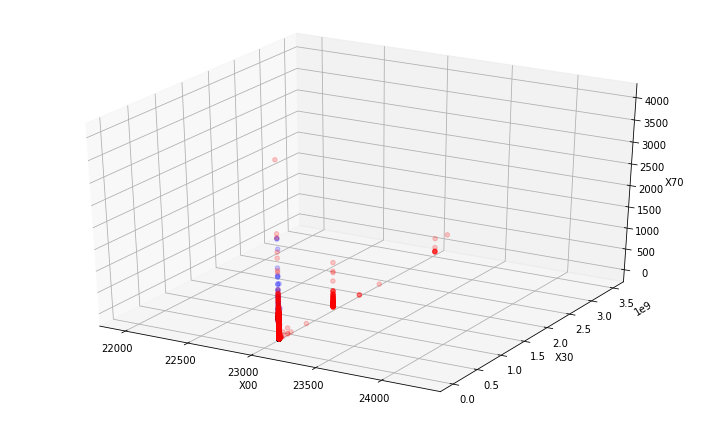

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')

ax.scatter(X.iloc[14599:,0], X.iloc[14599:,30], X.iloc[14599:,70], color="b", alpha=0.2)
ax.scatter(X.iloc[:14599,0], X.iloc[:14599,30], X.iloc[:14599,70], color="r", alpha=0.2)

ax.set_xlabel("X00")
ax.set_ylabel("X30")
ax.set_zlabel("X70")

plt.tight_layout()
plt.show()

## Dimensionality Reduction
- Projection based
- Manifold based

In [ ]:
from sklearn.decomposition import PCA
pca_3D = PCA(n_components=3)

In [ ]:
X_3D = pca_3D.fit_transform(X)

In [ ]:
X_3D.shape

(19611, 3)

In [ ]:
X.shape

(19611, 77)

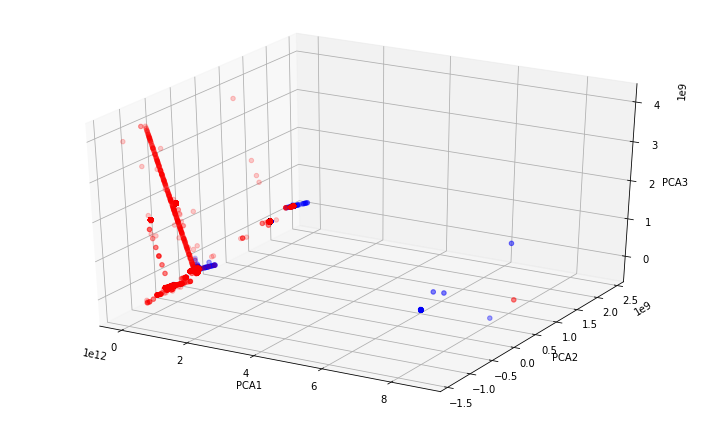

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')

ax.scatter(X_3D[14599:,0], X_3D[14599:,1], X_3D[14599:,2], color="b", alpha=0.2)
ax.scatter(X_3D[:14599,0], X_3D[:14599,1], X_3D[:14599,2], color="r", alpha=0.2)

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")

plt.tight_layout()
plt.show()

## Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [ ]:
pd.DataFrame(X_std, columns=X.columns).describe()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,19611.0,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,...,1.961100e+04,19611.0,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04
mean,0.0,-7.246369e-18,8.695643e-18,-8.695643e-18,-4.347822e-18,1.449274e-17,2.260867e-16,1.231883e-17,7.246369e-18,9.420280e-18,...,-4.637676e-17,0.0,-6.376805e-17,6.521732e-18,1.159419e-17,9.057962e-19,8.695643e-18,-7.246369e-18,-1.231883e-17,2.898548e-18
std,0.0,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,...,1.000025e+00,0.0,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,0.0,-1.809361e-01,-4.958686e-02,-4.054457e-02,-4.322845e-02,-4.043704e-02,-7.044462e+00,-1.635299e-02,-1.812232e-01,-2.924235e-02,...,-3.566255e+00,0.0,-8.122877e-01,-8.019987e-01,-9.120030e-02,-1.544410e-02,-8.602889e-02,-8.204097e-02,-2.110877e-02,-4.066791e-02
25%,0.0,-3.506542e-02,-4.751096e-02,-4.054457e-02,-3.860147e-02,-4.043704e-02,1.488674e-01,-1.635299e-02,-3.398180e-02,-2.924235e-02,...,9.827929e-02,0.0,-5.465057e-01,-6.682179e-01,-9.120030e-02,-1.544410e-02,-7.973616e-02,-7.599254e-02,-2.110877e-02,-4.066791e-02
50%,0.0,-3.506542e-02,-4.751096e-02,-4.054457e-02,-3.860147e-02,-4.043704e-02,1.488674e-01,-1.635299e-02,-3.398180e-02,-2.924235e-02,...,9.827929e-02,0.0,-2.807238e-01,-1.724419e-01,-9.120030e-02,-1.544410e-02,-6.855108e-02,-6.268597e-02,-2.110877e-02,-4.066791e-02
75%,0.0,-3.506542e-02,-4.751096e-02,-4.054457e-02,-3.860147e-02,-4.043704e-02,1.488674e-01,-1.635299e-02,-3.398180e-02,-2.924235e-02,...,9.827939e-02,0.0,2.508401e-01,2.603784e-01,-9.120030e-02,-1.544410e-02,-3.337526e-02,-2.488322e-02,-2.110877e-02,-2.597539e-02
max,0.0,6.003936e+01,4.368271e+01,5.326299e+01,5.049504e+01,4.766598e+01,1.488674e-01,9.641435e+01,5.220471e+01,6.228081e+01,...,1.930546e+00,0.0,7.732760e+01,3.080175e+01,4.714213e+01,9.844171e+01,1.140374e+02,1.225422e+02,4.949759e+01,1.114192e+02


In [ ]:
X.describe()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,19611.0,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,19611.000000,...,1.961100e+04,19611.0,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04
mean,23117.0,178.615726,71.660752,49.146958,37.370710,37.032635,64178.739687,10.418490,226.46530,29.689103,...,3.163632e+09,0.0,6.112437,101.912804,14.131865,3.368566e+05,4.047213e+05,5.555810e+05,1.238834e+06,8.814868e+05
std,0.0,987.200729,1445.192977,1212.201919,864.515405,915.833139,9110.755873,637.116265,1249.68033,1015.303419,...,5.860332e+08,0.0,7.525158,127.076767,154.958102,2.181191e+07,4.704601e+06,6.772167e+06,5.868961e+07,2.167579e+07
min,23117.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.073742e+09,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,2.000000,17.000000,0.000000,0.000000e+00,2.960400e+04,4.096000e+04,0.000000e+00,0.000000e+00
50%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,4.000000,80.000000,0.000000,0.000000e+00,8.222400e+04,1.310720e+05,0.000000e+00,0.000000e+00
75%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.00000,0.000000,...,3.221226e+09,0.0,8.000000,135.000000,0.000000,0.000000e+00,2.477080e+05,3.870720e+05,0.000000e+00,3.184640e+05
max,23117.0,59448.000000,63200.000000,64613.000000,43690.000000,43690.000000,65535.000000,61436.000000,65464.00000,63262.000000,...,4.294967e+09,0.0,588.000000,4016.000000,7319.000000,2.147484e+09,5.368914e+08,8.304108e+08,2.906159e+09,2.415919e+09


In [ ]:
from sklearn.decomposition import PCA
std_pca_3D = PCA(n_components=3)

In [ ]:
std_X_3D = pca_3D.fit_transform(X_std)

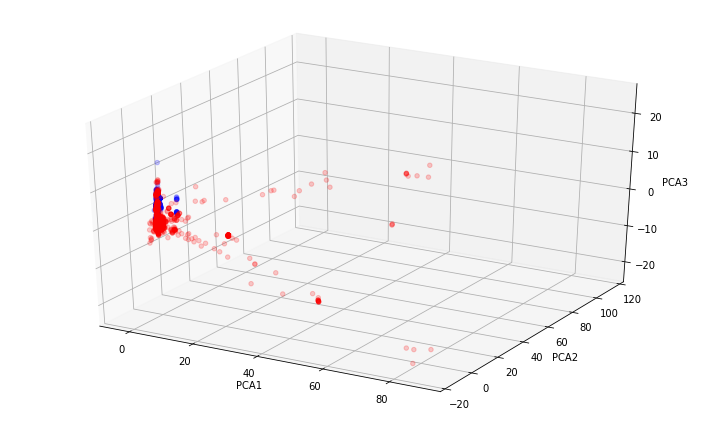

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')

ax.scatter(std_X_3D[14599:,0], std_X_3D[14599:,1], std_X_3D[14599:,2], color="b", alpha=0.2)
ax.scatter(std_X_3D[:14599,0], std_X_3D[:14599,1], std_X_3D[:14599,2], color="r", alpha=0.2)

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")

plt.tight_layout()
plt.show()

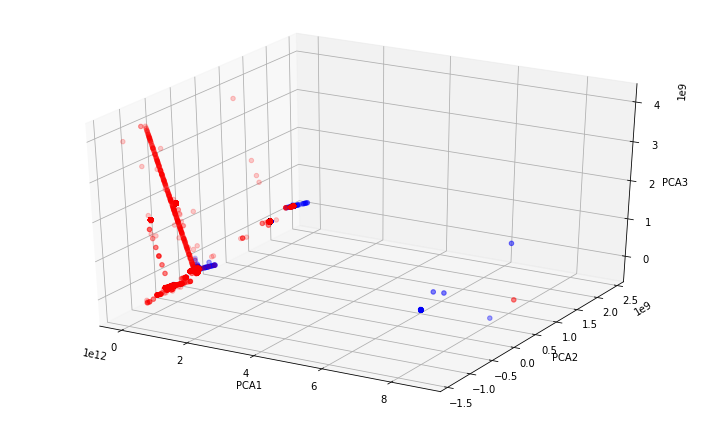

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')

ax.scatter(X_3D[14599:,0], X_3D[14599:,1], X_3D[14599:,2], color="b", alpha=0.2)
ax.scatter(X_3D[:14599,0], X_3D[:14599,1], X_3D[:14599,2], color="r", alpha=0.2)

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")

plt.tight_layout()
plt.show()

## Split the data into Training and Testing
- 80 - 20 split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(15688, 77)
(3923, 77)


## Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
score1 = lr_clf.score(X_test, y_test)
print("score1: ", score1)

score1:  0.25567167983685957


## Scaled features

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test) 

In [ ]:
std_lr_clf = LogisticRegression()
std_lr_clf.fit(X_train_std, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
score2 = std_lr_clf.score(X_test_std, y_test)
print("score2: ", score2)

score2:  0.9518225847565639


## Reduce the dimensions

In [ ]:
from sklearn.decomposition import PCA
pca_ND = PCA(n_components=20)

In [ ]:
# Estimates relevant details for projection
pca_ND.fit(X_train_std)

# Apply projection
X_train_std_ND = pca_ND.transform(X_train_std)
X_test_std_ND = pca_ND.transform(X_test_std)

print(X_train_std.shape)
print(X_train_std_ND.shape)

(15688, 77)
(15688, 20)


In [ ]:
pca_std_lr_clf = LogisticRegression()
pca_std_lr_clf.fit(X_train_std_ND, y_train)

LogisticRegression()

In [ ]:
score3 = pca_std_lr_clf.score(X_test_std_ND, y_test)
print("score3: ", score3)

score3:  0.9538618404282437


## Evaluate classifier performance
- lr_clf
- std_lr_clf
- pca_std_lr_clf

In [ ]:
y_predict1 = lr_clf.predict(X_test)
print(y_predict1[:10])
print(y_test[:10].values)

[0 0 0 0 0 0 0 0 0 0]
[1 0 1 1 1 1 0 1 1 0]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_predict1)

array([[1003,    0],
       [2920,    0]])

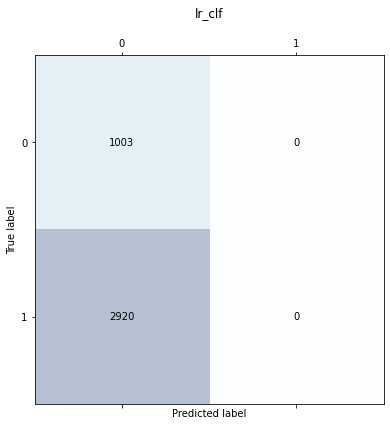

In [ ]:
cm = confusion_matrix(y_true = y_test, y_pred = y_predict1)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
        
ax.title.set_text('lr_clf\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig("ConfusionMatrix.png", dpi=300, format='png', pad_inches=0.3)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict1)
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict1)
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict1)
print("F1-score: ", fScore)

print("\n\n\n")

Precision:  0.0
Recall:  0.0
F1-score:  0.0






/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_predict2 = std_lr_clf.predict(X_test)
print(y_predict2[:10])
print(y_test[:10].values)

[1 1 1 1 1 1 1 1 1 1]
[1 0 1 1 1 1 0 1 1 0]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = y_test, y_pred = y_predict2)

array([[  72,  931],
       [  11, 2909]])

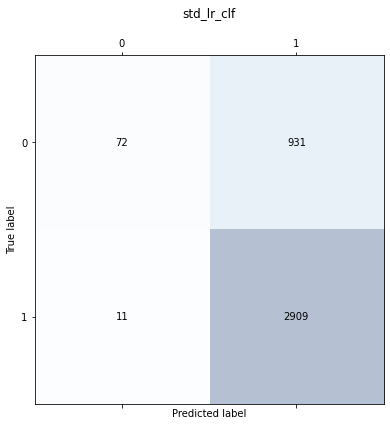

In [ ]:
cm = confusion_matrix(y_true = y_test, y_pred = y_predict2)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
        
ax.title.set_text('std_lr_clf\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict2)
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict2)
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict2)
print("F1-score: ", fScore)

print("\n\n\n")

Precision:  0.7575520833333333
Recall:  0.9962328767123287
F1-score:  0.8606508875739645






## Support Vector Machines

In [ ]:
from sklearn.svm import SVC

linearSVM = SVC(kernel='linear')
linearSVM.fit(X_train_std, y_train)

SVC(kernel='linear')

In [ ]:
score_svm_Linear = linearSVM.score(X_test_std, y_test)
print(score_svm_Linear)

0.9546265613051236


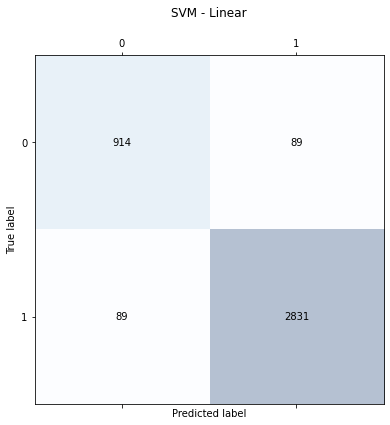

In [ ]:
y_predict_svmLinear = linearSVM.predict(X_test_std)

cm = confusion_matrix(y_true = y_test, y_pred = y_predict_svmLinear)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
        
ax.title.set_text('SVM - Linear\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict_svmLinear)
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict_svmLinear)
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict_svmLinear)
print("F1-score: ", fScore)

print("\n\n\n")

Precision:  0.9695205479452055
Recall:  0.9695205479452055
F1-score:  0.9695205479452055






## Kernel SVM

In [ ]:
kernelSVM = SVC(kernel='rbf')
kernelSVM.fit(X_train_std, y_train)

SVC()

In [ ]:
score_svm_RBF = kernelSVM.score(X_test_std, y_test)
print(score_svm_RBF)

0.9678817231710426


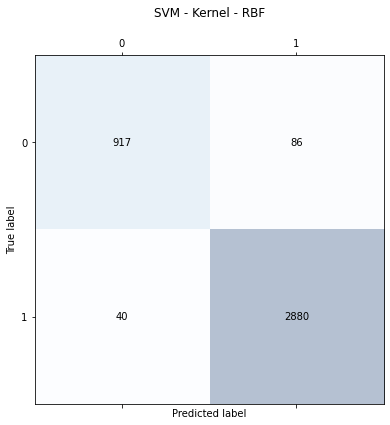

In [ ]:
y_predict_svmRBF = kernelSVM.predict(X_test_std)

cm = confusion_matrix(y_true = y_test, y_pred = y_predict_svmRBF)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
        
ax.title.set_text('SVM - Kernel - RBF\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict_svmRBF)
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict_svmRBF)
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict_svmRBF)
print("F1-score: ", fScore)

print("\n\n\n")

Precision:  0.9710047201618341
Recall:  0.9863013698630136
F1-score:  0.9785932721712538






## Deep Neural Network
- TensorFlow/Keras

In [ ]:
import tensorflow as tf 
from tensorflow import keras 

tf.random.set_seed(42)
np.random.seed(42)

print(tf.__version__)

2.9.2


In [ ]:
# Create the network using Functional API method

input_ = keras.layers.Input(shape = X_train.shape[1:])

x = keras.layers.Dense(units=100, activation='relu')(input_)

x = keras.layers.Dense(units=50, activation='relu')(x)

output_ = keras.layers.Dense(units=2, activation='softmax')(x)


model_DNN = keras.models.Model(inputs=[input_], outputs=[output_])

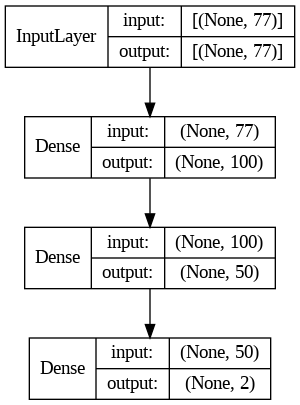

In [ ]:
tf.keras.utils.plot_model(
    model_DNN,
    to_file='model_DNN.png',
    show_shapes=True,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

In [ ]:
model_DNN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 77)]              0         
                                                                 
 dense (Dense)               (None, 100)               7800      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
Total params: 12,952
Trainable params: 12,952
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_DNN.compile(loss='sparse_categorical_crossentropy', 
                 optimizer='adam', 
                 metrics=['accuracy'])

In [ ]:
history_DNN = model_DNN.fit(X_train_std, y_train, epochs=50, 
                            validation_split=0.1, batch_size=64)

Epoch 1/50
221/221 [==============================] - 1s 4ms/step - loss: 0.1783 - accuracy: 0.9388 - val_loss: 0.0983 - val_accuracy: 0.9700
Epoch 2/50
221/221 [==============================] - 1s 3ms/step - loss: 0.0991 - accuracy: 0.9703 - val_loss: 0.0874 - val_accuracy: 0.9675
Epoch 3/50
221/221 [==============================] - 1s 2ms/step - loss: 0.0850 - accuracy: 0.9737 - val_loss: 0.0809 - val_accuracy: 0.9739
Epoch 4/50
221/221 [==============================] - 1s 3ms/step - loss: 0.0782 - accuracy: 0.9756 - val_loss: 0.0769 - val_accuracy: 0.9802
Epoch 5/50
221/221 [==============================] - 1s 3ms/step - loss: 0.0702 - accuracy: 0.9783 - val_loss: 0.0729 - val_accuracy: 0.9802
Epoch 6/50
221/221 [==============================] - 1s 3ms/step - loss: 0.0654 - accuracy: 0.9802 - val_loss: 0.0768 - val_accuracy: 0.9783
Epoch 7/50
221/221 [==============================] - 1s 3ms/step - loss: 0.0622 - accuracy: 0.9814 - val_loss: 0.0696 - val_accuracy: 0.9822
Epoch 

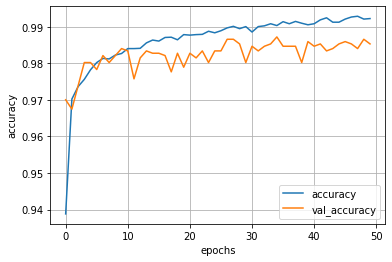

In [ ]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_DNN.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

In [ ]:
test_loss, test_accuracy = model_DNN.evaluate(X_test_std, y_test)
print("Test-loss: %f, Test-accuracy: %f" % (test_loss, test_accuracy))

123/123 [==============================] - 0s 1ms/step - loss: 0.0916 - accuracy: 0.9837
Test-loss: 0.091552, Test-accuracy: 0.983686


In [ ]:
y_proba = model_DNN.predict(X_test_std)
y_predict_DNN = np.argmax(y_proba, axis=-1)    
print(y_predict_DNN[:25])

123/123 [==============================] - 0s 1ms/step
[1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


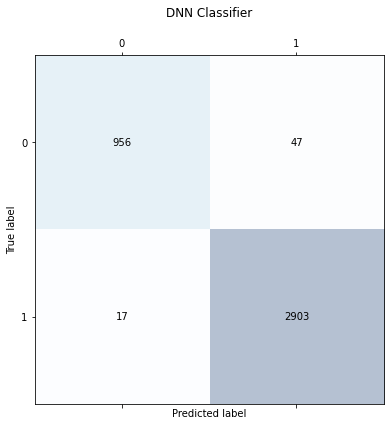

In [ ]:
cm = confusion_matrix(y_true = y_test, y_pred = y_predict_DNN)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
        
ax.title.set_text('DNN Classifier\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict_DNN)
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict_DNN)
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict_DNN)
print("F1-score: ", fScore)

print("\n\n\n")

Precision:  0.9840677966101695
Recall:  0.9941780821917808
F1-score:  0.9890971039182284






## Enesmble Learning

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=50, max_depth=25, n_jobs=-1, random_state=42)
rf_clf.fit(X_train_std, y_train)
score_rf = rf_clf.score(X_test_std, y_test)
print(score_rf)

0.9915880703543207


In [ ]:
predicted_rf = rf_clf.predict(X_test_std)
print(predicted_rf[:10])

[1 0 1 1 1 1 0 1 1 0]


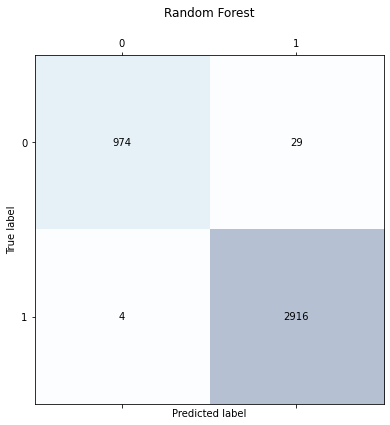

In [ ]:
cm = confusion_matrix(y_true = y_test, y_pred = predicted_rf)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
        
ax.title.set_text('Random Forest\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = predicted_rf)
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict_DNN)
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict_DNN)
print("F1-score: ", fScore)

print("\n\n\n")

Precision:  0.9901528013582342
Recall:  0.9941780821917808
F1-score:  0.9890971039182284






In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=50, max_depth=12, random_state=42)
gb_clf.fit(X_train_std, y_train)
score_gb = gb_clf.score(X_test_std, y_test)
print(score_gb)

0.9885291868468009


In [ ]:
predicted_gb = gb_clf.predict(X_test_std)
print(predicted_gb[:10])

[1 0 1 1 1 1 0 1 1 0]


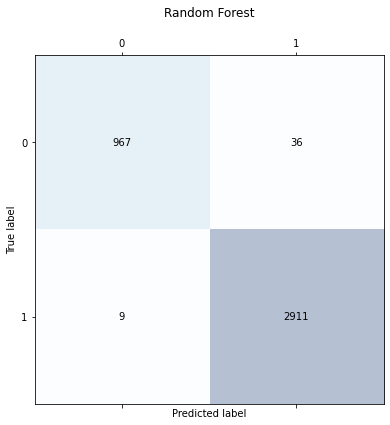

In [ ]:
cm = confusion_matrix(y_true = y_test, y_pred = predicted_gb)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
        
ax.title.set_text('Random Forest\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = predicted_gb)
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict_DNN)
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict_DNN)
print("F1-score: ", fScore)

print("\n\n\n")

Precision:  0.987784187309128
Recall:  0.9941780821917808
F1-score:  0.9890971039182284






## Hyperparameter Tuning
- Grid Search
- Random Search

### Uses Cross Validation

### Grid Search


In [ ]:
hpt_rf_clf = RandomForestClassifier(n_jobs=-1)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Specify the parameter grid for tuning as list of dictionary

hpt_param_grid = [
    {'n_estimators':[i for i in range(10, 50,10)], 
     'max_depth': [j for j in range(2,15,3)]}
    ]


In [ ]:
hpt_param_grid

[{'n_estimators': [10, 20, 30, 40], 'max_depth': [2, 5, 8, 11, 14]}]

In [ ]:
grid_search = GridSearchCV(estimator = hpt_rf_clf, 
                           param_grid = hpt_param_grid, 
                           cv = 5)

In [ ]:
grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid=[{'max_depth': [2, 5, 8, 11, 14],
                          'n_estimators': [10, 20, 30, 40]}])

In [ ]:
print(grid_search.best_params_)

{'max_depth': 14, 'n_estimators': 20}


In [ ]:
print(grid_search.best_score_)

0.9912672266476337


In [ ]:
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=14, n_estimators=20, n_jobs=-1)


In [ ]:
CV_results = grid_search.cv_results_

In [ ]:
for elem in CV_results:
    print(elem)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_max_depth
param_n_estimators
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [ ]:
for mean_score, std_score, rank_score in zip(
    CV_results['mean_test_score'], CV_results['std_test_score'], CV_results['rank_test_score']):
    print(mean_score, std_score, rank_score)

0.9393156740830317 0.00972450902180973 20
0.949387407803366 0.009478007139186256 17
0.9442882733744105 0.007763555186997603 19
0.9467750098385743 0.009011500035304225 18
0.9775625651037302 0.002952014732070298 16
0.9786460171399443 0.0025817647779111776 13
0.9781999137334305 0.0023031621767249785 14
0.9780085669245521 0.003077250326327384 15
0.98425551808398 0.0022498332808471894 12
0.9872514223520621 0.0010663261398726161 9
0.9868689319056886 0.0014166957175281625 10
0.9862315426417115 0.0017844504441842167 11
0.9896098764047523 0.0016449796628071928 7
0.9895461415417823 0.0011822228653128762 8
0.9901836120743127 0.0021555710263164527 5
0.9898010200422475 0.0014681567807536362 6
0.9903111021173912 0.0013306262924261448 4
0.9912672266476337 0.0021575818330637985 1
0.990438490574778 0.0016866467793242082 3
0.9906934706609347 0.002088975354030073 2


### Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
hpt_param_dist = {'n_estimators':[i for i in range(10,50,10)], 
                  'max_depth': [j for j in range(2,15,3)]}

In [ ]:
hpt_param_dist

{'n_estimators': [10, 20, 30, 40], 'max_depth': [2, 5, 8, 11, 14]}

In [ ]:
random_search = RandomizedSearchCV(estimator = hpt_rf_clf, 
                                   param_distributions=hpt_param_dist, 
                                   cv=5)

In [ ]:
random_search.fit(X_train_std, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': [2, 5, 8, 11, 14],
                                        'n_estimators': [10, 20, 30, 40]})

In [ ]:
random_search.best_params_

{'n_estimators': 20, 'max_depth': 14}

In [ ]:
random_search.best_score_

0.9906936128809031

In [ ]:
random_search.best_estimator_

RandomForestClassifier(max_depth=14, n_estimators=20, n_jobs=-1)

In [ ]:
rCV_results = random_search.cv_results_

In [ ]:
for elem in rCV_results:
    print(elem)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_n_estimators
param_max_depth
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
mean_test_score
std_test_score
rank_test_score


In [ ]:
for mean_score, std_score, rank_score in zip(
    rCV_results['mean_test_score'], rCV_results['std_test_score'], rCV_results['rank_test_score']):
    print(mean_score, std_score, rank_score)

0.976988788799893 0.001566391562854992 8
0.9890361001009152 0.0019297209230683913 4
0.989737386764969 0.0016298765332412896 3
0.9868690538085186 0.001499246336188319 6
0.9370218285302603 0.004761025095080787 10
0.987187971929029 0.0025273157752282098 5
0.9906936128809031 0.001999003882775936 1
0.948368056338612 0.006822697358994416 9
0.9898648768080476 0.00198907941399701 2
0.9836181694542796 0.003046831513841437 7
